In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
path='./'
users= pd.read_csv(path+'users.csv')
users.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [4]:
path='./'
books= pd.read_csv(path+'books.csv')
books.head()

C:\Users\Nischal\AppData\Local\Temp\ipykernel_10808\2515215624.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  books= pd.read_csv(path+'books.csv')


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [5]:
path='./'
ratings= pd.read_csv(path+'ratings.csv')
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,9
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [6]:
print(f'''\t Book_df shape is {books.shape}
Ratings_df shape is {ratings.shape}
Users_df shape is {users.shape}''')

	 Book_df shape is (271360, 8)
Ratings_df shape is (1149780, 3)
Users_df shape is (278858, 3)


C:\Users\Nischal\AppData\Local\Temp\ipykernel_10808\3278320818.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(users.Age)


<Axes: xlabel='Age', ylabel='Density'>

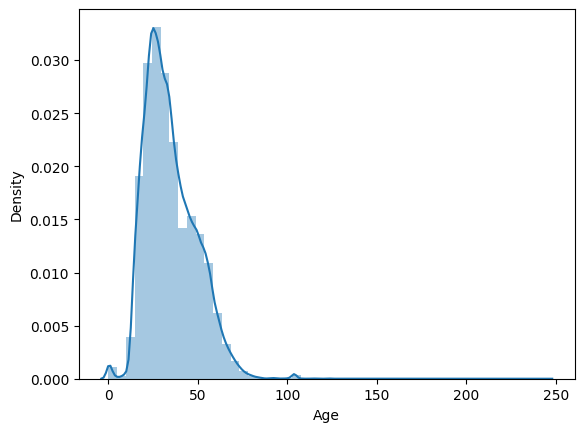

In [7]:
sns.distplot(users.Age)

In [8]:
import matplotlib.pyplot as plt

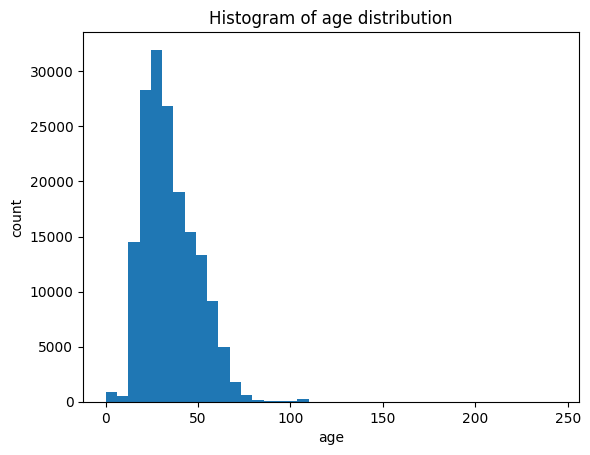

In [9]:
data= users.Age
plt.hist(data, bins=40)
plt.xlabel('age')
plt.ylabel('count')
plt.title('Histogram of age distribution')
plt.show()

In [10]:
for i in users:
    users['country']=users.Location.str.extract(r'\,+\s?(\w*\s?\w*)\"*$')
print(users)




        User-ID                            Location   Age         country
0             1                  nyc, new york, usa   NaN             usa
1             2           stockton, california, usa  18.0             usa
2             3     moscow, yukon territory, russia   NaN          russia
3             4           porto, v.n.gaia, portugal  17.0        portugal
4             5  farnborough, hants, united kingdom   NaN  united kingdom
...         ...                                 ...   ...             ...
278853   278854               portland, oregon, usa   NaN             usa
278854   278855  tacoma, washington, united kingdom  50.0  united kingdom
278855   278856           brampton, ontario, canada   NaN          canada
278856   278857           knoxville, tennessee, usa   NaN             usa
278857   278858                dublin, n/a, ireland   NaN         ireland

[278858 rows x 4 columns]


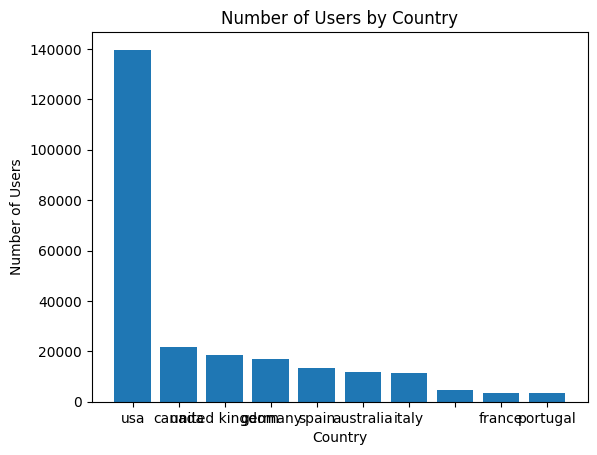

In [11]:



data = users

users = pd.DataFrame(data)

country_counts = users['country'].value_counts()

top10_counts = country_counts.head(10)
plt.bar(top10_counts.index, top10_counts.values)


plt.xlabel('Country')
plt.ylabel('Number of Users')
plt.title('Number of Users by Country')


plt.show()


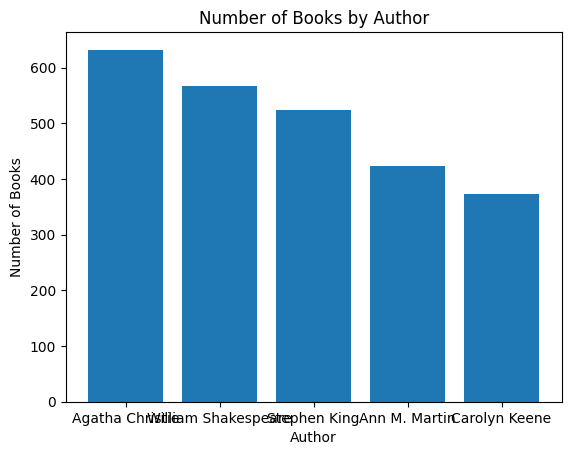

In [12]:

data = books
books = pd.DataFrame(data)

book_counts = books['Book-Author'].value_counts()

top5_counts = book_counts.head(5)
plt.bar(top5_counts.index, top5_counts.values)
plt.xlabel('Author')
plt.ylabel('Number of Books')
plt.title('Number of Books by Author')
plt.show()


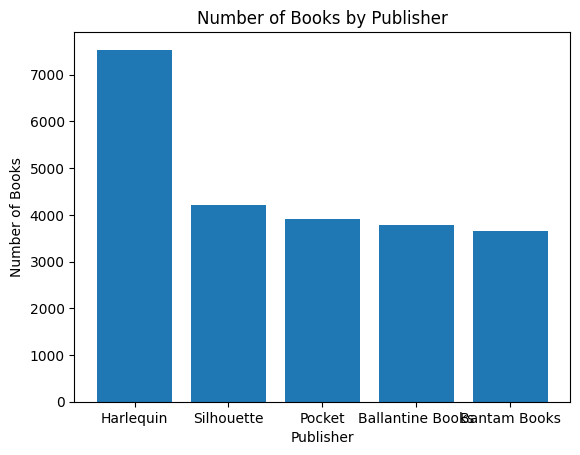

In [13]:

data = books
books = pd.DataFrame(data)

book_counts = books['Publisher'].value_counts()

top5_counts = book_counts.head(5)
plt.bar(top5_counts.index, top5_counts.values)
plt.xlabel('Publisher')
plt.ylabel('Number of Books')
plt.title('Number of Books by Publisher')
plt.show()


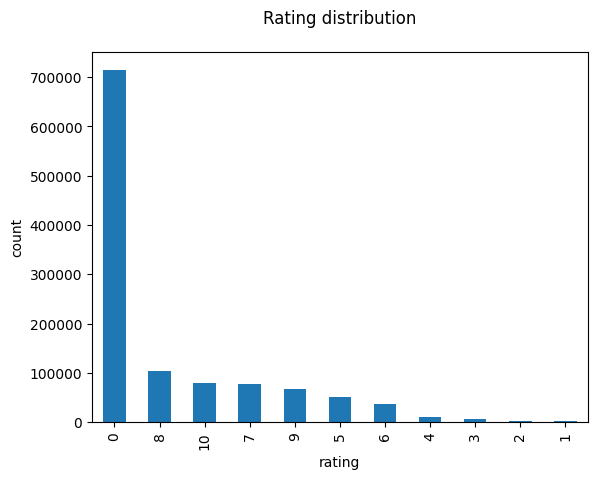

In [14]:

ratings['Book-Rating'].value_counts(sort=True).plot(kind='bar')
plt.title('Rating distribution\n')
plt.xlabel('rating')
plt.ylabel('count')
plt.show()

In [15]:
df = users
missing_data = df.isnull()
print(missing_data.sum())


User-ID          0
Location         0
Age         110762
country        368
dtype: int64


In [16]:
def missing_values(df):
    mis_val=df.isnull().sum()
    mis_val_percent=round(df.isnull().mean().mul(100), 2)
    mz_table=pd.concat([mis_val, mis_val_percent], axis=1)
    mz_table=mz_table.rename(
    columns={df.index.name: 'col_name', 0: 'Missing Values', 1: '% of Total Values'})
    mz_table['Data_type']=df.dtypes
    mz_table=mz_table.sort_values ('% of Total Values', ascending=False)
    return mz_table.reset_index()


In [17]:
missing_values(users)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,country,368,0.13,object
2,User-ID,0,0.00,int64
3,Location,0,0.00,object


In [18]:
books.isna().sum()

ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64

In [19]:
missing_values(ratings)

,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,ISBN,0,0.0,object
2,Book-Rating,0,0.0,int64


In [20]:
df = pd.read_csv('users.csv')



In [21]:
missing_values(df)

,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


In [22]:
# interpolate missing values
df.interpolate(inplace=True)
missing_values(df)


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Location,0,0.0,object
2,Age,1,0.0,float64


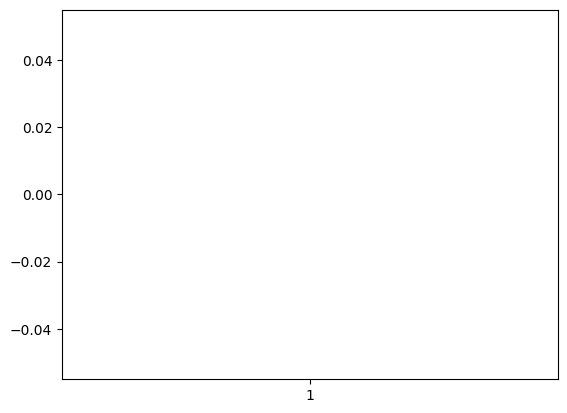

In [23]:

# load data
data = pd.read_csv('users.csv')

# calculate summary statistics
mean = data['Age'].mean()
median = data['Age'].median()
std = data['Age'].std()
min_val = data['Age'].min()
max_val = data['Age'].max()

# create boxplot
plt.boxplot(data['Age'])

# calculate IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]

# handle outliers
# e.g. remove outliers from data
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]


In [24]:
df = pd.read_csv('users.csv')
missing_values(df)


,index,Missing Values,% of Total Values,Data_type
0,Age,110762,39.72,float64
1,User-ID,0,0.00,int64
2,Location,0,0.00,object


C:\Users\Nischal\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
C:\Users\Nischal\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


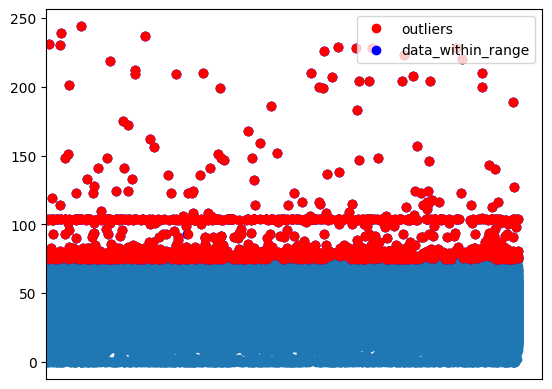

In [25]:

# load data
data = df

# calculate summary statistics
mean = data['Age'].mean()
median = data['Age'].median()
std = data['Age'].std()
min_val = data['Age'].min()
max_val = data['Age'].max()

# create boxplot
plt.boxplot(data['Age'])

# calculate IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
# plot outliers on boxplot
plt.plot(outliers.index+1, outliers['Age'], 'ro', label='outliers')
plt.legend()

# create scatterplot
plt.scatter(data.index, data['Age'])

# plot outliers on scatterplot
plt.scatter(outliers.index, outliers['Age'], color='b', label='data_within_range')
plt.legend()


In [26]:
# interpolate missing values
data = data[(data['Age'] >= lower_bound) & (data['Age'] <= upper_bound)]

data.interpolate(inplace=True)
missing_values(data)


C:\Users\Nischal\AppData\Local\Temp\ipykernel_10808\1054623255.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.interpolate(inplace=True)


,index,Missing Values,% of Total Values,Data_type
0,User-ID,0,0.0,int64
1,Location,0,0.0,object
2,Age,0,0.0,float64


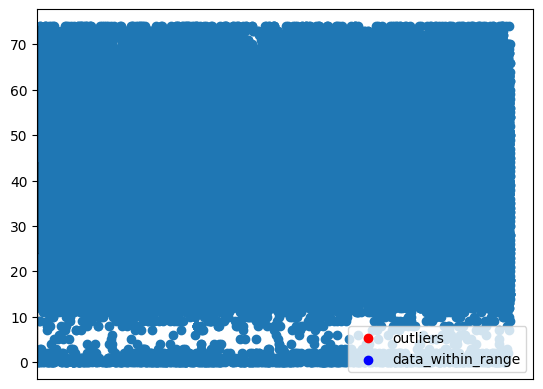

In [27]:


# calculate summary statistics
mean = data['Age'].mean()
median = data['Age'].median()
std = data['Age'].std()
min_val = data['Age'].min()
max_val = data['Age'].max()

# create boxplot
plt.boxplot(data['Age'])

# calculate IQR
Q1 = data['Age'].quantile(0.25)
Q3 = data['Age'].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data['Age'] < lower_bound) | (data['Age'] > upper_bound)]
# plot outliers on boxplot
plt.plot(outliers.index+1, outliers['Age'], 'ro', label='outliers')
plt.legend()

# create scatterplot
plt.scatter(data.index, data['Age'])

# plot outliers on scatterplot
plt.scatter(outliers.index, outliers['Age'], color='b', label='data_within_range')
plt.legend()
